<H1> IAD LAB 1 </H1>
<h2>Умова:</h2>

11. Дано масив  $T = \{(t_{i}) | t_{i} = (x_{i1}, x_{i2}, ..., x_{im}), i=1, ..., N\}, x_{ij}\in R $, де приклад $t_{i}$ характеризується <i>m</i> ознаками. Задано кількість кластерів $2\leq g \leq N$. Розрахувати центри кластерів за формулою:
$$c_{i}={\sum_{i=1}^N u_{ki}t_{i} \over \sum_{i=1}^N u_{ki}}, k=1,...,g,$$<br>
    де $U=\{(u_{ki})|k=1,...,g,i=1,...,g\}$ - випадковим чином задана матриця початкового розбиття, $u_{ki}\in \{0,1\}, \sum_{k=1}^g u_{ki}=1, \sum_{i=1}^N u_{ki}<N$.<br><br>
    Перерахувати матрицю розбиття:<br>
    $u_{ki}=1$ якщо $d(t_{i},c_{k}) = min_{l=1,...,g}d(t_{i},c_{l})$,<br>
    $u_{ki}=0$ в іншому випадку,<br>
    за умови, що $d(t_{i},c_{k})$ - евклідова відстань між векторами.<br>
    Виконати декілька ітерацій з уточнення центрів кластерів.

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

In [128]:
g = 5  #Количество кластеров
m = 20 #Количество признаков 
N = 350 #Количество примеров

In [129]:
# Размерности кластеров, которые отобразим на графике для проверки качества нахождения центров
dim1 = np.random.randint(0, m)
dim2 = np.random.randint(0, m)
while (dim2 == dim1):
    dim2 = np.random.randint(0, m)




## One way to create clusters

In [130]:
# Инициация примеров по отдаленным кластерам
T, y = make_blobs(n_samples=N, centers=g, n_features=m, random_state=42)

## Another way to create clusters

In [131]:
centers = np.random.randint(-100, 100, (g, m))
clust_size = int(N/g) #Кол-во элементов в кластере

T = np.zeros((N, m))
for i in range(g):
    for j in range(clust_size):
        T[i*clust_size + j] = np.random.normal(centers[i], 5, (1, m))
np.random.shuffle(T)
print("Центры кластеров:\n", centers)

Центры кластеров:
 [[  0 -66  33  20  51  68 -59  53  47  56  94  64  30  23  67  26  94 -54
  -55  73]
 [ 88  33  24 -46 -88 -60  64  37 -77  44  29  -3 -24 -28  18  -2  26  67
   -2  73]
 [-32  63 -85  49 -30   5  16  49   6  43 -23  44  -8 -86  23 -53  71 -33
   96  55]
 [ -7  81 -83  47  28  24 -92 -81 -19  60 -34 -68  63  10  -6 -72 -57  41
   -5 -75]
 [ 92  62  41  64   3  36 -38  93  97 -12 -58  91  96  18  50  13 -27 -68
   -8  11]]


## Cluster plot

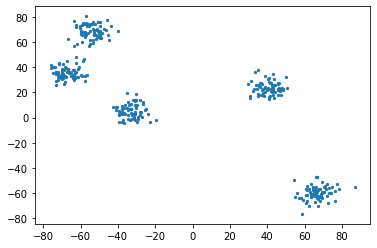

In [132]:
# 2D графическое представление расположения кластеров
plt.scatter(T[:, dim1], T[:, dim2], s=5)

In [133]:
#Инициализация начальных матриц
u = np.zeros((g, N))
c = np.zeros((g, m))

for _ in range(N):
    u[np.random.randint(0, g),_] = 1

for k in range(g):
    c[k] = (u[k].dot(T))/sum(u[k])

div = []
#Итеративное уточнение значений кластеров
iter_num = 10
for iters in range(iter_num):
    mm = []
    for i in range(N):
        m = np.argmin([np.linalg.norm(T[i] - c[k]) for k in range(g)])
        mm.append(m)
        for _ in range(g):
            u[_, i] = 0
        
        u[m, i] = 1
        for _ in u:
            if sum(_) == 0:
                _[np.random.randint(0, g)] = 1 # Сглаживание на случай, если начальный спавн центров дает нули после итерации
    
    for k in range(g):
        c[k] = (u[k].dot(T))/sum(u[k])
    
    c_ = c[c[:, 1].argsort()]
    centers = centers[centers[:, 1].argsort()]
    div.append(np.max(c_-centers, axis=1).mean())
    #print(c)







# Plot

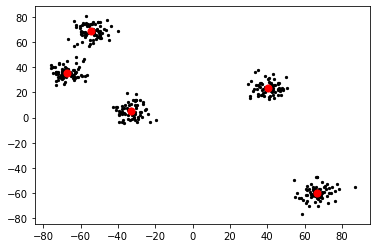

In [134]:
plt.scatter(T[:, dim1], T[:, dim2], s=5, color = "black")
plt.scatter(c[:, dim1], c[:, dim2], s=50, color="red")

## Невязка нахождения центров

Text(0.5, 1.0, 'Значение невязки от кол-ва итераций')

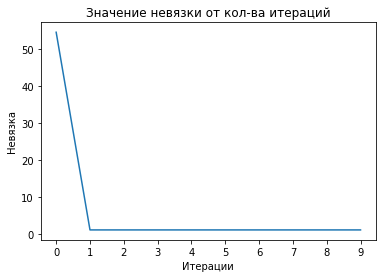

In [135]:
c = c[c[:, 1].argsort()]
centers = centers[centers[:, 1].argsort()]

plt.plot(range(iter_num), div)
plt.xticks(range(iter_num))
plt.xlabel("Итерации")
plt.ylabel("Невязка")
plt.title("Значение невязки от кол-ва итераций")